# Import packages

In [113]:
import pandas as pd
import numpy as np

dtype = {
        'project_year': float, 'accounting_year': float, 'account_id': str,
}

# Load each file individually

The Scope 1 and 2 data is located in the 'Emissions Data' section of the CDP reports but has widely varying column and reporting formats so it was simplest to load them all individually into separate dataframes and then concatenate them after.

In [131]:


path_2013 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2013 Public Climate Change Data.xlsx'


Scope_df_2013 = pd.read_excel(path_2013, sheet_name='8. Emissions Data', dtype=dtype)
Scope_1_2_df_2013 = Scope_df_2013.copy()
Scope_1_2_df_2013.columns = Scope_1_2_df_2013.columns.str.strip()


Scope_1_2_df_2013.rename(columns={'8.2 - Please provide your gross global Scope 1 emissions figures in metric tonnes CO2e': 'Scope 1 amount'}, inplace=True)
Scope_1_2_df_2013.rename(columns={'8.3 - Please provide your gross global Scope 2 emissions figures in metric tonnes CO2e': 'Scope 2 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'accounting_year', 'Scope 1 amount', 'Scope 2 amount']
Scope_1_2_df_2013 = Scope_1_2_df_2013[columns_to_keep]

grouped_df_2013 = Scope_1_2_df_2013.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df_2013 = grouped_df_2013.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2013 = grouped_df_2013.reset_index()
grouped_df_2013['project_year'] = grouped_df_2013['project_year'].astype(int)

grouped_df_2013['Scope 1 2 amount combined'] = (
    grouped_df_2013['Scope 1 amount'].fillna(0) +
    grouped_df_2013['Scope 2 amount'].fillna(0)
)

grouped_df_2013.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2013.head()

,account_id,project_year,Scope 1 2 amount combined
0,44,2013,406.350000
1,45,2013,19.000000
2,53,2013,143572.966667
3,55,2013,168147.000000
4,58,2013,58188.280000


In [129]:
path_2014 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2014 Public Climate Change Data.xlsx'


Scope_df = pd.read_excel(path_2014, sheet_name='CC8. Emissions Data', dtype=dtype)
Scope_1_2_df = Scope_df.copy()
Scope_1_2_df.columns = Scope_1_2_df.columns.str.strip()


Scope_1_2_df.rename(columns={'CC8.2 - Please provide your gross global Scope 1 emissions figures in metric tonnes CO2e': 'Scope 1 amount'}, inplace=True)
Scope_1_2_df.rename(columns={'CC8.3 - Please provide your gross global Scope 2 emissions figures in metric tonnes CO2e': 'Scope 2 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'accounting_year', 'Scope 1 amount', 'Scope 2 amount']
Scope_1_2_df = Scope_1_2_df[columns_to_keep]

grouped_df = Scope_1_2_df.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2014 = grouped_df.reset_index()
grouped_df_2014['project_year'] = grouped_df_2014['project_year'].astype(int)

grouped_df_2014['Scope 1 2 amount combined'] = (
    grouped_df_2014['Scope 1 amount'].fillna(0) +
    grouped_df_2014['Scope 2 amount'].fillna(0)
)


grouped_df_2014.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2014.head()

,account_id,project_year,Scope 1 2 amount combined
0,44,2014,303.220000
1,45,2014,18.000000
2,53,2014,157217.816667
3,55,2014,150801.000000
4,58,2014,57459.900000


In [137]:
path_2015 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2015 Public Climate Change Data.xlsx'


Scope_df = pd.read_excel(path_2015, sheet_name='CC8. Emissions Data', dtype=dtype)
Scope_1_2_df = Scope_df.copy()
Scope_1_2_df.columns = Scope_1_2_df.columns.str.strip()


Scope_1_2_df.rename(columns={'CC8.2 - Please provide your gross global Scope 1 emissions figures in metric tonnes CO2e': 'Scope 1 amount'}, inplace=True)
Scope_1_2_df.rename(columns={'CC8.3 - Please provide your gross global Scope 2 emissions figures in metric tonnes CO2e': 'Scope 2 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'accounting_year', 'Scope 1 amount', 'Scope 2 amount']
Scope_1_2_df = Scope_1_2_df[columns_to_keep]

grouped_df = Scope_1_2_df.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2015 = grouped_df.reset_index()
grouped_df_2015['project_year'] = grouped_df_2015['project_year'].astype(int)

grouped_df_2015['Scope 1 2 amount combined'] = (
    grouped_df_2015['Scope 1 amount'].fillna(0) +
    grouped_df_2015['Scope 2 amount'].fillna(0)
)

grouped_df_2015.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2015.head()

,account_id,project_year,Scope 1 2 amount combined
0,45,2015,0.000000e+00
1,53,2015,1.790728e+05
2,58,2015,5.642052e+04
3,63,2015,2.039754e+04
4,64,2015,1.046667e+06


In [139]:
path_2016 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2016 Public Climate Change Data.xlsx'


Scope_1_df = pd.read_excel(path_2016, sheet_name='CC8. Emissions Data', dtype=dtype)
Scope_1_df = Scope_1_df.copy()
Scope_1_df.columns = Scope_1_df.columns.str.strip()

Scope_1_df.rename(columns={'CC8.2 - Please provide your gross global Scope 1 emissions figures in metric tonnes CO2e': 'Scope 1 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'accounting_year', 'Scope 1 amount']
Scope_1_df = Scope_1_df[columns_to_keep]


Scope_2_df = pd.read_excel(path_2016, sheet_name='CC8.3a', dtype=dtype)
Scope_2_df = Scope_2_df.copy()
Scope_2_df.columns = Scope_2_df.columns.str.strip()

Scope_2_df.rename(columns={'CC8.3a C1 - Please provide your gross global Scope 2 emissions figures in metric tonnes CO2e  - Scope 2, location-based?': 'Scope 2 amount location-based'}, inplace=True)
Scope_2_df.rename(columns={'CC8.3a C2 - Please provide your gross global Scope 2 emissions figures in metric tonnes CO2e  - Scope 2, market-based (if applicable)?': 'Scope 2 amount market-based'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'accounting_year', 'Scope 2 amount location-based', 'Scope 2 amount market-based']
Scope_2_df = Scope_2_df[columns_to_keep]

def add_with_null_handling(row):
    loc = row['Scope 2 amount location-based']
    market = row['Scope 2 amount market-based']

    if pd.isnull(loc) and pd.isnull(market):
        return np.nan
    else:
        return (loc if pd.notnull(loc) else 0) + (market if pd.notnull(market) else 0)

# Create the new 'Scope 2 amount' column
Scope_2_df['Scope 2 amount'] = Scope_2_df.apply(add_with_null_handling, axis=1)

# Drop the original columns
Scope_2_df = Scope_2_df.drop(['Scope 2 amount location-based', 'Scope 2 amount market-based'], axis=1)

Scope_1_2_df = pd.merge(
    Scope_1_df, Scope_2_df, 
    on=["account_id", "project_year"], 
    how="outer"
)

# Resolving duplicate columns: keeping non-null values
Scope_1_2_df["account_name"] = Scope_1_2_df["account_name_x"].combine_first(Scope_1_2_df["account_name_y"])
Scope_1_2_df["accounting_year"] = Scope_1_2_df["accounting_year_x"].combine_first(Scope_1_2_df["accounting_year_y"])

# Dropping the now redundant columns
Scope_1_2_df.drop(columns=["account_name_x", "account_name_y", "accounting_year_x", "accounting_year_y"], inplace=True)

# Converting 'account_id' to string type
Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(int)

# Sorting by 'account_id' in ascending order
Scope_1_2_df = Scope_1_2_df.sort_values(by="account_id", ascending=True).reset_index(drop=True)

Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(str)

Scope_1_2_df["project_year"] = Scope_1_2_df["project_year"].astype(int)

Scope_1_2_df.drop(columns=["accounting_year"], inplace=True)

grouped_df = Scope_1_2_df.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2016 = grouped_df.reset_index()
grouped_df_2016['project_year'] = grouped_df_2016['project_year'].astype(int)

grouped_df_2016['Scope 1 2 amount combined'] = (
    grouped_df_2016['Scope 1 amount'].fillna(0) +
    grouped_df_2016['Scope 2 amount'].fillna(0)
)

grouped_df_2016.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2016.head()



,account_id,project_year,Scope 1 2 amount combined
0,44,2016,1651.00
1,45,2016,0.00
2,53,2016,123194.50
3,58,2016,55676.76
4,63,2016,33424.00


In [141]:
path_2017 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2017 Public Climate Change Data.xlsx'
cdp_path = path_2017

scope1_ws = 'CC8. Emissions Data'
scope2_ws = 'CC8.3a'

scope1_col ='CC8.2 - Please provide your gross global Scope 1 emissions figures in metric tonnes CO2e'
scope2_market_col = 'CC8.3a C2 - Please provide your gross global Scope 2 emissions figures in metric tonnes CO2e  - Scope 2, market-based (if applicable)?'
scope2_loc_col = 'CC8.3a C1 - Please provide your gross global Scope 2 emissions figures in metric tonnes CO2e  - Scope 2, location-based?'

Scope_1_df = pd.read_excel(cdp_path, sheet_name=scope1_ws, dtype=dtype)
Scope_1_df = Scope_1_df.copy()
Scope_1_df.columns = Scope_1_df.columns.str.strip()

Scope_1_df.rename(columns={scope1_col: 'Scope 1 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'accounting_year', 'Scope 1 amount']
Scope_1_df = Scope_1_df[columns_to_keep]


Scope_2_df = pd.read_excel(cdp_path, sheet_name=scope2_ws, dtype=dtype)
Scope_2_df = Scope_2_df.copy()
Scope_2_df.columns = Scope_2_df.columns.str.strip()

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)
Scope_2_df.rename(columns={scope2_market_col: 'Scope 2 amount market-based'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'accounting_year', 'Scope 2 amount location-based', 'Scope 2 amount market-based']
Scope_2_df = Scope_2_df[columns_to_keep]

def add_with_null_handling(row):
    loc = row['Scope 2 amount location-based']
    market = row['Scope 2 amount market-based']

    if pd.isnull(loc) and pd.isnull(market):
        return np.nan
    else:
        return (loc if pd.notnull(loc) else 0) + (market if pd.notnull(market) else 0)

# Create the new 'Scope 2 amount' column
Scope_2_df['Scope 2 amount'] = Scope_2_df.apply(add_with_null_handling, axis=1)

# Drop the original columns
Scope_2_df = Scope_2_df.drop(['Scope 2 amount location-based', 'Scope 2 amount market-based'], axis=1)

Scope_1_2_df = pd.merge(
    Scope_1_df, Scope_2_df, 
    on=["account_id", "project_year"], 
    how="outer"
)

# Resolving duplicate columns: keeping non-null values
Scope_1_2_df["account_name"] = Scope_1_2_df["account_name_x"].combine_first(Scope_1_2_df["account_name_y"])
Scope_1_2_df["accounting_year"] = Scope_1_2_df["accounting_year_x"].combine_first(Scope_1_2_df["accounting_year_y"])

# Dropping the now redundant columns
Scope_1_2_df.drop(columns=["account_name_x", "account_name_y", "accounting_year_x", "accounting_year_y"], inplace=True)

# Converting 'account_id' to string type
Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(int)

# Sorting by 'account_id' in ascending order
Scope_1_2_df = Scope_1_2_df.sort_values(by="account_id", ascending=True).reset_index(drop=True)

Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(str)

Scope_1_2_df["project_year"] = Scope_1_2_df["project_year"].astype(int)

Scope_1_2_df.drop(columns=["accounting_year"], inplace=True)

grouped_df = Scope_1_2_df.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2017 = grouped_df.reset_index()
grouped_df_2017['project_year'] = grouped_df_2017['project_year'].astype(int)

grouped_df_2017['Scope 1 2 amount combined'] = (
    grouped_df_2017['Scope 1 amount'].fillna(0) +
    grouped_df_2017['Scope 2 amount'].fillna(0)
)

grouped_df_2017.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2017.head()



,account_id,project_year,Scope 1 2 amount combined
0,44,2017,1135.000000
1,45,2017,0.000000
2,53,2017,120659.333333
3,58,2017,47672.410000
4,63,2017,31468.000000


In [143]:
project_year = 2018
path_2018 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2018 Public Climate Change Data.xlsx'
cdp_path = path_2018
scope1_ws = 'C6.1'
scope2_ws = 'C6.3'

scope1_col ='C6.1_C1_What were your organization’s gross global Scope 1 emissions in metric tons CO2e? - Gross global Scope 1 emissions (metric tons CO2e)'
scope2_market_col = 'C6.3_C2_What were your organization’s gross global Scope 2 emissions in metric tons CO2e? - Scope 2, market-based (if applicable)'
scope2_loc_col = 'C6.3_C1_What were your organization’s gross global Scope 2 emissions in metric tons CO2e? - Scope 2, location-based' 

Scope_1_df = pd.read_excel(cdp_path, sheet_name=scope1_ws, dtype=dtype)
Scope_1_df = Scope_1_df.copy()
Scope_1_df.columns = Scope_1_df.columns.str.strip()
Scope_1_df['project_year'] = project_year
Scope_1_df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_1_df.rename(columns={"Organization": "account_name"}, inplace=True)
Scope_1_df.rename(columns={"Row": "accounting_year"}, inplace=True)

Scope_1_df.rename(columns={scope1_col: 'Scope 1 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', "accounting_year", 'account_name', 'Scope 1 amount']

Scope_1_df = Scope_1_df[columns_to_keep]


Scope_2_df = pd.read_excel(cdp_path, sheet_name=scope2_ws, dtype=dtype)
Scope_2_df = Scope_2_df.copy()
Scope_2_df.columns = Scope_2_df.columns.str.strip()
Scope_2_df['project_year'] = project_year
Scope_2_df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_2_df.rename(columns={"Organization": "account_name"}, inplace=True)
Scope_2_df.rename(columns={"Row": "accounting_year"}, inplace=True)

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)
Scope_2_df.rename(columns={scope2_market_col: 'Scope 2 amount market-based'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', "accounting_year", 'Scope 2 amount location-based', 'Scope 2 amount market-based']
Scope_2_df = Scope_2_df[columns_to_keep]

def add_with_null_handling(row):
    loc = row['Scope 2 amount location-based']
    market = row['Scope 2 amount market-based']

    # Convert 'Question not applicable' and non-numeric values to NaN
    loc = pd.to_numeric(loc, errors='coerce')
    market = pd.to_numeric(market, errors='coerce')

    # Handle null values and return sum
    return (loc if pd.notnull(loc) else 0) + (market if pd.notnull(market) else 0)

# Apply function to create the new 'Scope 2 amount' column
Scope_2_df['Scope 2 amount'] = Scope_2_df.apply(add_with_null_handling, axis=1)


Scope_1_2_df = pd.merge(
    Scope_1_df, Scope_2_df, 
    on=["account_id", "project_year"], 
    how="outer"
)
# Resolving duplicate columns: keeping non-null values
Scope_1_2_df["account_name"] = Scope_1_2_df["account_name_x"].combine_first(Scope_1_2_df["account_name_y"])
Scope_1_2_df["accounting_year"] = Scope_1_2_df["accounting_year_x"].combine_first(Scope_1_2_df["accounting_year_y"])

# Dropping the now redundant columns
Scope_1_2_df.drop(columns=["account_name_x", "account_name_y", "accounting_year_x", "accounting_year_y"], inplace=True)

# Converting 'account_id' to string type
Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(int)

# Sorting by 'account_id' in ascending order
Scope_1_2_df = Scope_1_2_df.sort_values(by="account_id", ascending=True).reset_index(drop=True)

Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(str)

Scope_1_2_df["project_year"] = Scope_1_2_df["project_year"].astype(int)

Scope_1_2_df.drop(columns=["accounting_year"], inplace=True)
Scope_1_2_df[['Scope 1 amount', 'Scope 2 amount']] = Scope_1_2_df[['Scope 1 amount', 'Scope 2 amount']].replace('Question not applicable', np.nan)

Scope_1_2_df['Scope 1 amount'] = pd.to_numeric(Scope_1_2_df['Scope 1 amount'], errors='coerce')
Scope_1_2_df['Scope 2 amount'] = pd.to_numeric(Scope_1_2_df['Scope 2 amount'], errors='coerce')


grouped_df = Scope_1_2_df.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2018 = grouped_df.reset_index()
grouped_df_2018['project_year'] = grouped_df_2018['project_year'].astype(int)

grouped_df_2018['Scope 1 2 amount combined'] = (
    grouped_df_2018['Scope 1 amount'].fillna(0) +
    grouped_df_2018['Scope 2 amount'].fillna(0)
)

grouped_df_2018.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2018.head()



,account_id,project_year,Scope 1 2 amount combined
0,44,2018,3.389500e+02
1,53,2018,1.097878e+05
2,58,2018,4.776430e+04
3,64,2018,1.633750e+06
4,87,2018,8.087580e+06


In [145]:
project_year = 2019
path_2019 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2019 Public Climate Change Data.xlsx'
cdp_path = path_2019
scope1_ws = 'C6.1'
scope2_ws = 'C6.3'

scope1_col ='C6.1_C1_What were your organization’s gross global Scope 1 emissions in metric tons CO2e? - Gross global Scope 1 emissions (metric tons CO2e)'
scope2_market_col = 'C6.3_C2_What were your organization’s gross global Scope 2 emissions in metric tons CO2e? - Scope 2, market-based (if applicable)'
scope2_loc_col = 'C6.3_C1_What were your organization’s gross global Scope 2 emissions in metric tons CO2e? - Scope 2, location-based' 

Scope_1_df = pd.read_excel(cdp_path, sheet_name=scope1_ws, dtype=dtype)
Scope_1_df = Scope_1_df.copy()
Scope_1_df.columns = Scope_1_df.columns.str.strip()
Scope_1_df['project_year'] = project_year
Scope_1_df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_1_df.rename(columns={"Organization": "account_name"}, inplace=True)
Scope_1_df.rename(columns={"Row": "accounting_year"}, inplace=True)

Scope_1_df.rename(columns={scope1_col: 'Scope 1 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', "accounting_year", 'account_name', 'Scope 1 amount']

Scope_1_df = Scope_1_df[columns_to_keep]


Scope_2_df = pd.read_excel(cdp_path, sheet_name=scope2_ws, dtype=dtype)
Scope_2_df = Scope_2_df.copy()
Scope_2_df.columns = Scope_2_df.columns.str.strip()
Scope_2_df['project_year'] = project_year
Scope_2_df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_2_df.rename(columns={"Organization": "account_name"}, inplace=True)
Scope_2_df.rename(columns={"Row": "accounting_year"}, inplace=True)

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)
Scope_2_df.rename(columns={scope2_market_col: 'Scope 2 amount market-based'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', "accounting_year", 'Scope 2 amount location-based', 'Scope 2 amount market-based']
Scope_2_df = Scope_2_df[columns_to_keep]

def add_with_null_handling(row):
    loc = row['Scope 2 amount location-based']
    market = row['Scope 2 amount market-based']

    # Convert 'Question not applicable' and non-numeric values to NaN
    loc = pd.to_numeric(loc, errors='coerce')
    market = pd.to_numeric(market, errors='coerce')

    # Handle null values and return sum
    return (loc if pd.notnull(loc) else 0) + (market if pd.notnull(market) else 0)

# Apply function to create the new 'Scope 2 amount' column
Scope_2_df['Scope 2 amount'] = Scope_2_df.apply(add_with_null_handling, axis=1)


Scope_1_2_df = pd.merge(
    Scope_1_df, Scope_2_df, 
    on=["account_id", "project_year"], 
    how="outer"
)
# Resolving duplicate columns: keeping non-null values
Scope_1_2_df["account_name"] = Scope_1_2_df["account_name_x"].combine_first(Scope_1_2_df["account_name_y"])
Scope_1_2_df["accounting_year"] = Scope_1_2_df["accounting_year_x"].combine_first(Scope_1_2_df["accounting_year_y"])

# Dropping the now redundant columns
Scope_1_2_df.drop(columns=["account_name_x", "account_name_y", "accounting_year_x", "accounting_year_y"], inplace=True)

# Converting 'account_id' to string type
Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(int)

# Sorting by 'account_id' in ascending order
Scope_1_2_df = Scope_1_2_df.sort_values(by="account_id", ascending=True).reset_index(drop=True)

Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(str)

Scope_1_2_df["project_year"] = Scope_1_2_df["project_year"].astype(int)

Scope_1_2_df.drop(columns=["accounting_year"], inplace=True)
Scope_1_2_df[['Scope 1 amount', 'Scope 2 amount']] = Scope_1_2_df[['Scope 1 amount', 'Scope 2 amount']].replace('Question not applicable', np.nan)

Scope_1_2_df['Scope 1 amount'] = pd.to_numeric(Scope_1_2_df['Scope 1 amount'], errors='coerce')
Scope_1_2_df['Scope 2 amount'] = pd.to_numeric(Scope_1_2_df['Scope 2 amount'], errors='coerce')


grouped_df = Scope_1_2_df.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2019 = grouped_df.reset_index()
grouped_df_2019['project_year'] = grouped_df_2019['project_year'].astype(int)

grouped_df_2019['Scope 1 2 amount combined'] = (
    grouped_df_2019['Scope 1 amount'].fillna(0) +
    grouped_df_2019['Scope 2 amount'].fillna(0)
)

grouped_df_2019.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2019.head()



,account_id,project_year,Scope 1 2 amount combined
0,44,2019,294.775
1,53,2019,121746.750
2,58,2019,50879.805
3,63,2019,17170.000
4,64,2019,1570500.000


In [147]:
project_year = 2020
path_2020 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2020 Public Climate Change Data.xlsx'
cdp_path = path_2020
scope1_ws = 'C6.1'
scope2_ws = 'C6.3'

scope1_col ='C6.1_C1_What were your organization’s gross global Scope 1 emissions in metric tons CO2e? - Gross global Scope 1 emissions (metric tons CO2e)'
scope2_market_col = 'C6.3_C2_What were your organization’s gross global Scope 2 emissions in metric tons CO2e? - Scope 2, market-based (if applicable)'
scope2_loc_col = 'C6.3_C1_What were your organization’s gross global Scope 2 emissions in metric tons CO2e? - Scope 2, location-based' 

Scope_1_df = pd.read_excel(cdp_path, sheet_name=scope1_ws, dtype=dtype)
Scope_1_df = Scope_1_df.copy()
Scope_1_df.columns = Scope_1_df.columns.str.strip()
Scope_1_df['project_year'] = project_year
Scope_1_df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_1_df.rename(columns={"Organization": "account_name"}, inplace=True)
Scope_1_df.rename(columns={"Row": "accounting_year"}, inplace=True)

Scope_1_df.rename(columns={scope1_col: 'Scope 1 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', "accounting_year", 'account_name', 'Scope 1 amount']

Scope_1_df = Scope_1_df[columns_to_keep]


Scope_2_df = pd.read_excel(cdp_path, sheet_name=scope2_ws, dtype=dtype)
Scope_2_df = Scope_2_df.copy()
Scope_2_df.columns = Scope_2_df.columns.str.strip()
Scope_2_df['project_year'] = project_year
Scope_2_df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_2_df.rename(columns={"Organization": "account_name"}, inplace=True)
Scope_2_df.rename(columns={"Row": "accounting_year"}, inplace=True)

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)
Scope_2_df.rename(columns={scope2_market_col: 'Scope 2 amount market-based'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', "accounting_year", 'Scope 2 amount location-based', 'Scope 2 amount market-based']
Scope_2_df = Scope_2_df[columns_to_keep]

def add_with_null_handling(row):
    loc = row['Scope 2 amount location-based']
    market = row['Scope 2 amount market-based']

    # Convert 'Question not applicable' and non-numeric values to NaN
    loc = pd.to_numeric(loc, errors='coerce')
    market = pd.to_numeric(market, errors='coerce')

    # Handle null values and return sum
    return (loc if pd.notnull(loc) else 0) + (market if pd.notnull(market) else 0)

# Apply function to create the new 'Scope 2 amount' column
Scope_2_df['Scope 2 amount'] = Scope_2_df.apply(add_with_null_handling, axis=1)


Scope_1_2_df = pd.merge(
    Scope_1_df, Scope_2_df, 
    on=["account_id", "project_year"], 
    how="outer"
)
# Resolving duplicate columns: keeping non-null values
Scope_1_2_df["account_name"] = Scope_1_2_df["account_name_x"].combine_first(Scope_1_2_df["account_name_y"])
Scope_1_2_df["accounting_year"] = Scope_1_2_df["accounting_year_x"].combine_first(Scope_1_2_df["accounting_year_y"])

# Dropping the now redundant columns
Scope_1_2_df.drop(columns=["account_name_x", "account_name_y", "accounting_year_x", "accounting_year_y"], inplace=True)

# Converting 'account_id' to string type
Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(int)

# Sorting by 'account_id' in ascending order
Scope_1_2_df = Scope_1_2_df.sort_values(by="account_id", ascending=True).reset_index(drop=True)

Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(str)

Scope_1_2_df["project_year"] = Scope_1_2_df["project_year"].astype(int)

Scope_1_2_df.drop(columns=["accounting_year"], inplace=True)
Scope_1_2_df[['Scope 1 amount', 'Scope 2 amount']] = Scope_1_2_df[['Scope 1 amount', 'Scope 2 amount']].replace('Question not applicable', np.nan)

Scope_1_2_df['Scope 1 amount'] = pd.to_numeric(Scope_1_2_df['Scope 1 amount'], errors='coerce')
Scope_1_2_df['Scope 2 amount'] = pd.to_numeric(Scope_1_2_df['Scope 2 amount'], errors='coerce')


grouped_df = Scope_1_2_df.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2020 = grouped_df.reset_index()
grouped_df_2020['project_year'] = grouped_df_2020['project_year'].astype(int)

grouped_df_2020['Scope 1 2 amount combined'] = (
    grouped_df_2020['Scope 1 amount'].fillna(0) +
    grouped_df_2020['Scope 2 amount'].fillna(0)
)

grouped_df_2020.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2020.head()



,account_id,project_year,Scope 1 2 amount combined
0,44,2020,296.835
1,45,2020,0.000
2,53,2020,118019.500
3,58,2020,52248.380
4,64,2020,1547750.000


In [148]:
project_year = 2021
path_2021 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2021 Public Climate Change Data.xlsx'
cdp_path = path_2021
scope1_ws = 'C6.1'
scope2_ws = 'C6.3'

scope1_col ='C6.1_C1_What were your organization’s gross global Scope 1 emissions in metric tons CO2e? - Gross global Scope 1 emissions (metric tons CO2e)'
scope2_market_col = 'C6.3_C2_What were your organization’s gross global Scope 2 emissions in metric tons CO2e? - Scope 2, market-based (if applicable)'
scope2_loc_col = 'C6.3_C1_What were your organization’s gross global Scope 2 emissions in metric tons CO2e? - Scope 2, location-based' 

Scope_1_df = pd.read_excel(cdp_path, sheet_name=scope1_ws, dtype=dtype)
Scope_1_df = Scope_1_df.copy()
Scope_1_df.columns = Scope_1_df.columns.str.strip()
Scope_1_df['project_year'] = project_year
Scope_1_df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_1_df.rename(columns={"Organization": "account_name"}, inplace=True)
Scope_1_df.rename(columns={"Row": "accounting_year"}, inplace=True)

Scope_1_df.rename(columns={scope1_col: 'Scope 1 amount'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', "accounting_year", 'account_name', 'Scope 1 amount']

Scope_1_df = Scope_1_df[columns_to_keep]


Scope_2_df = pd.read_excel(cdp_path, sheet_name=scope2_ws, dtype=dtype)
Scope_2_df = Scope_2_df.copy()
Scope_2_df.columns = Scope_2_df.columns.str.strip()
Scope_2_df['project_year'] = project_year
Scope_2_df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_2_df.rename(columns={"Organization": "account_name"}, inplace=True)
Scope_2_df.rename(columns={"Row": "accounting_year"}, inplace=True)

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)

Scope_2_df.rename(columns={scope2_loc_col: 'Scope 2 amount location-based'}, inplace=True)
Scope_2_df.rename(columns={scope2_market_col: 'Scope 2 amount market-based'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', "accounting_year", 'Scope 2 amount location-based', 'Scope 2 amount market-based']
Scope_2_df = Scope_2_df[columns_to_keep]

def add_with_null_handling(row):
    loc = row['Scope 2 amount location-based']
    market = row['Scope 2 amount market-based']

    # Convert 'Question not applicable' and non-numeric values to NaN
    loc = pd.to_numeric(loc, errors='coerce')
    market = pd.to_numeric(market, errors='coerce')

    # Handle null values and return sum
    return (loc if pd.notnull(loc) else 0) + (market if pd.notnull(market) else 0)

# Apply function to create the new 'Scope 2 amount' column
Scope_2_df['Scope 2 amount'] = Scope_2_df.apply(add_with_null_handling, axis=1)


Scope_1_2_df = pd.merge(
    Scope_1_df, Scope_2_df, 
    on=["account_id", "project_year"], 
    how="outer"
)
# Resolving duplicate columns: keeping non-null values
Scope_1_2_df["account_name"] = Scope_1_2_df["account_name_x"].combine_first(Scope_1_2_df["account_name_y"])
Scope_1_2_df["accounting_year"] = Scope_1_2_df["accounting_year_x"].combine_first(Scope_1_2_df["accounting_year_y"])

# Dropping the now redundant columns
Scope_1_2_df.drop(columns=["account_name_x", "account_name_y", "accounting_year_x", "accounting_year_y"], inplace=True)

# Converting 'account_id' to string type
Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(int)

# Sorting by 'account_id' in ascending order
Scope_1_2_df = Scope_1_2_df.sort_values(by="account_id", ascending=True).reset_index(drop=True)

Scope_1_2_df["account_id"] = Scope_1_2_df["account_id"].astype(str)

Scope_1_2_df["project_year"] = Scope_1_2_df["project_year"].astype(int)

Scope_1_2_df.drop(columns=["accounting_year"], inplace=True)
Scope_1_2_df[['Scope 1 amount', 'Scope 2 amount']] = Scope_1_2_df[['Scope 1 amount', 'Scope 2 amount']].replace('Question not applicable', np.nan)

Scope_1_2_df['Scope 1 amount'] = pd.to_numeric(Scope_1_2_df['Scope 1 amount'], errors='coerce')
Scope_1_2_df['Scope 2 amount'] = pd.to_numeric(Scope_1_2_df['Scope 2 amount'], errors='coerce')


grouped_df = Scope_1_2_df.groupby(['account_id', 'project_year'])[['Scope 1 amount', 'Scope 2 amount']].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2021 = grouped_df.reset_index()
grouped_df_2021['project_year'] = grouped_df_2021['project_year'].astype(int)

grouped_df_2021['Scope 1 2 amount combined'] = (
    grouped_df_2021['Scope 1 amount'].fillna(0) +
    grouped_df_2021['Scope 2 amount'].fillna(0)
)

grouped_df_2021.drop(columns=["Scope 1 amount", "Scope 2 amount"], inplace=True)

grouped_df_2021.head()



,account_id,project_year,Scope 1 2 amount combined
0,44,2021,2.181250e+02
1,53,2021,1.225064e+05
2,58,2021,3.828465e+04
3,64,2021,1.472000e+06
4,79,2021,2.350750e+03


In [153]:
project_year = 2022
path_2022 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2022 Public Climate Change Data.xlsx'
cdp_path = path_2022
scope1_2_ws = 'C6.10'


scope1_2col ='C6.10_C2_Describe your gross global combined Scope 1 and 2 emissions for the reporting year in metric tons CO2e per unit currency total revenue and provide any additional intensity metrics that are appropriate to your business operations. - Metric numerator (Gross global combined Scope 1 and 2 emissions, metric tons CO2e)'

Scope_1_2df = pd.read_excel(cdp_path, sheet_name=scope1_2_ws, dtype=dtype, header=1)
Scope_1_2df = Scope_1_2df.copy()
Scope_1_2df.columns = Scope_1_2df.columns.str.strip()
Scope_1_2df['project_year'] = project_year
Scope_1_2df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_1_2df.rename(columns={"Organization": "account_name"}, inplace=True)

Scope_1_2df.rename(columns={scope1_2col: 'Scope 1 2 amount combined'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'Scope 1 2 amount combined']

Scope_1_2df = Scope_1_2df[columns_to_keep]



Scope_1_2df['Scope 1 2 amount combined'] = pd.to_numeric(Scope_1_2df['Scope 1 2 amount combined'], errors='coerce')



grouped_df = Scope_1_2df.groupby(['account_id', 'project_year'])['Scope 1 2 amount combined'].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2022 = grouped_df.reset_index()
grouped_df_2022['project_year'] = grouped_df_2022['project_year'].astype(int)



grouped_df_2022.head()



,account_id,project_year,Scope 1 2 amount combined
0,44,2022,269.90
1,53,2022,108490.38
2,58,2022,39530.00
3,64,2022,930000.00
4,79,2022,2914.00


In [154]:
project_year = 2023
path_2023 = r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\2023 Public Climate Change Data_v3.xlsx'
cdp_path = path_2023
scope1_2_ws = 'C6.10'


scope1_2col ='C6.10_C2_Describe your gross global combined Scope 1 and 2 emissions for the reporting year in metric tons CO2e per unit currency total revenue and provide any additional intensity metrics that are appropriate to your business operations. - Metric numerator (Gross global combined Scope 1 and 2 emissions, metric tons CO2e)'

Scope_1_2df = pd.read_excel(cdp_path, sheet_name=scope1_2_ws, dtype=dtype, header=1)
Scope_1_2df = Scope_1_2df.copy()
Scope_1_2df.columns = Scope_1_2df.columns.str.strip()
Scope_1_2df['project_year'] = project_year
Scope_1_2df.rename(columns={"Account number": "account_id"}, inplace=True)
Scope_1_2df.rename(columns={"Organization": "account_name"}, inplace=True)

Scope_1_2df.rename(columns={scope1_2col: 'Scope 1 2 amount combined'}, inplace=True)

columns_to_keep = ['account_id', 'project_year', 'account_name', 'Scope 1 2 amount combined']

Scope_1_2df = Scope_1_2df[columns_to_keep]



Scope_1_2df['Scope 1 2 amount combined'] = pd.to_numeric(Scope_1_2df['Scope 1 2 amount combined'], errors='coerce')



grouped_df = Scope_1_2df.groupby(['account_id', 'project_year'])['Scope 1 2 amount combined'].mean()
grouped_df = grouped_df.sort_index(level='account_id', key=lambda x: pd.to_numeric(x), ascending=True)
grouped_df_2023 = grouped_df.reset_index()
grouped_df_2023['project_year'] = grouped_df_2023['project_year'].astype(int)


grouped_df_2023.head()



,account_id,project_year,Scope 1 2 amount combined
0,26,2023,9264.00
1,30,2023,8375.00
2,44,2023,181.60
3,53,2023,80898.18
4,58,2023,44953.00


# Combine year datatframes

In [157]:
dfs = [
    grouped_df_2013, grouped_df_2014, grouped_df_2015, grouped_df_2016, 
    grouped_df_2017, grouped_df_2018, grouped_df_2019, grouped_df_2020, 
    grouped_df_2021, grouped_df_2022, grouped_df_2023
]
combined_scope_1_2_df = pd.concat(dfs, axis=0, ignore_index=True)

# Save as .json

In [4]:
combined_dict = combined_scope_1_2_df.set_index(['account_id', 'project_year'])['Scope 1 2 amount combined'].to_dict()
import json

# Convert tuple keys to strings, e.g., "account_id_project_year"
combined_dict_str_keys = {f"{k[0]}_{k[1]}": v for k, v in combined_dict.items()}

with open(r'C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\combined_scope_1_2.json', 'w', encoding='utf-8-sig') as f:
    json.dump(combined_dict_str_keys, f, ensure_ascii=False, indent=4)



NameError: name 'combined_scope_1_2_df' is not defined

# Plot Scope 1 and 2 totals over time

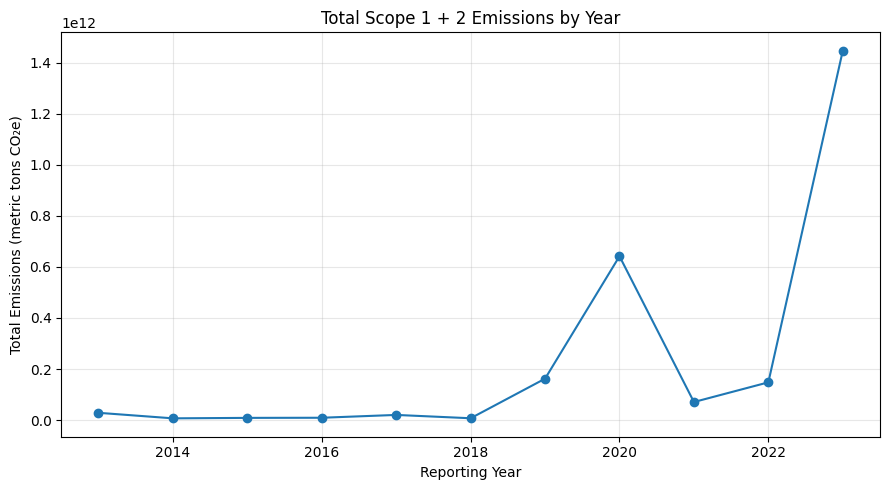

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Load the JSON (note the encoding) ----------
json_path = r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\combined_scope_1_2.json"
with open(json_path, "r", encoding="utf-8-sig") as f:
    raw = json.load(f)

# ---------- 2. Parse “account_year” keys into tidy rows ----------
records = []
for k, v in raw.items():
    acct, yr = k.split("_")
    records.append({"Account": int(acct), "Year": int(yr), "Total": float(v)})

df = pd.DataFrame(records)

# ---------- 3. Aggregate totals by year ----------
year_totals = df.groupby("Year")["Total"].sum().sort_index()

# ---------- 4. Visualize ----------
plt.figure(figsize=(9, 5))
plt.plot(year_totals.index, year_totals.values, marker="o")
plt.title("Total Scope 1 + 2 Emissions by Year")
plt.xlabel("Reporting Year")
plt.ylabel("Total Emissions (metric tons CO₂e)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [4]:
df.head()

,Account,Year,Total
0,44,2013,406.350000
1,45,2013,19.000000
2,53,2013,143572.966667
3,55,2013,168147.000000
4,58,2013,58188.280000


# Point out outliers in Scope 1 and 2 data

C:\Users\cliff\AppData\Local\Temp\ipykernel_7936\4110258914.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


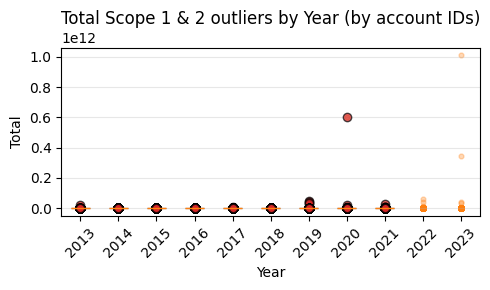

In [26]:
fig, ax = plt.subplots(figsize=(5,3))

# 1) boxplot with tighter whiskers
bp = ax.boxplot(
    data_by_year,
    labels=[str(y) for y in years],
    whis=0.8,
    patch_artist=True,
    boxprops=dict(facecolor='C0', alpha=0.4),
    flierprops=dict(marker='o', markerfacecolor='C3', alpha=0.7)
)

# 2) overlay all points
for i, y in enumerate(years):
    vals = df.loc[df['Year']==y, 'Total']
    ax.scatter(
        [i+1]*len(vals), vals,
        color='C1', alpha=0.3, s=12
    )

ax.set_title("Total Scope 1 & 2 outliers by Year (by account IDs)")
ax.set_ylabel("Total")
ax.set_xlabel("Year")
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Sort the DataFrame by 'Total' in descending order
df_sorted = df.sort_values(by='Total', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame (or just the top rows)
print(df_sorted.head(10))


   Account  Year         Total
0   923888  2023  1.011459e+12
1   846878  2020  6.008571e+11
2   905272  2023  3.452731e+11
3     9578  2022  6.280053e+10
4    61966  2019  4.841491e+10
5     9577  2022  4.186718e+10
6   828402  2019  4.142875e+10
7   904906  2023  4.060000e+10
8   842880  2023  3.680000e+10
9   831912  2019  3.310000e+10
